In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import tensorflow as tf
from keras import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error as mae 
# from keras_tuner.tuners import RandomSearch
# import keras_tuner
from sklearn.metrics import mean_squared_error
import keras.backend as K
from sklearn.metrics import r2_score
import os
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Dense
from keras import regularizers, initializers
from keras.layers import Dropout
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

In [3]:
from google.colab import drive
# drive.flush_and_unmount()
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def MAPE(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [5]:
def adjusted_r_squared(X, y, r2_sc):
  Adj_r2 = 1 - (1-r2_sc) * (len(y)-1)/(len(y)-X.shape[1]-1)
  return Adj_r2

Dataset for Direct Prediction of D_max values

In [6]:
feature_columns = ['h_mix','s_mix','delta_d','delta_e'] # 'Alloy_Formula',
target = 'D_max'

X_train = pd.read_csv("/content/drive/MyDrive/Mendeley Dataset/Combination/Manual_Segregation/Final_X_train.csv")
X_test = pd.read_csv("/content/drive/MyDrive/Mendeley Dataset/Combination/Manual_Segregation/Final_X_test.csv")
y_train = pd.read_csv("/content/drive/MyDrive/Mendeley Dataset/Combination/Manual_Segregation/Final_y_train.csv")
y_test = pd.read_csv("/content/drive/MyDrive/Mendeley Dataset/Combination/Manual_Segregation/Final_y_test.csv")

X_train.drop('Unnamed: 0',axis = 1,inplace = True)
X_test.drop('Unnamed: 0',axis = 1,inplace = True)
y_train.drop('Unnamed: 0',axis = 1,inplace = True)
y_test.drop('Unnamed: 0',axis = 1,inplace = True)

from sklearn.preprocessing import StandardScaler
# Defining Scaling
scaler = StandardScaler()
scaler.fit(X_train)

# Transforming Datasets according to scaling defined
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Saving Scalar Parameters
import pickle
pickle.dump(scaler, open('/content/drive/MyDrive/Mendeley Dataset/Combination/Scalings/st_scaler.sav', 'wb'))

In [7]:
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(964, 4) (273, 4) (964, 1) (273, 1)


Direct Prediction of Dmax using Machine Learning Models

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# from hypopt import GridSearch
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.neighbors import KNeighborsRegressor


In [9]:
filename1 = '/content/drive/MyDrive/Mendeley Dataset/Combination/Scalings/Saved_Models/Regression/new_random_forest_regressor.sav'
random_forest_model = pickle.load(open(filename1, 'rb'))


train_pred = random_forest_model.predict(x_train_scaled)
test_pred = random_forest_model.predict(x_test_scaled)

  
rf_r2_Train = random_forest_model.score(x_train_scaled,y_train)
rf_r2_Test = random_forest_model.score(x_test_scaled,y_test)
rf_mse_Train = mse(y_train, train_pred)
rf_mse_Test = mse(y_test, test_pred)
rf_mae_Train = mae(y_train, train_pred)
rf_mae_Test = mae(y_test, test_pred)
rf_mape_Train = MAPE(y_train, train_pred)
rf_mape_Test = MAPE(y_test, test_pred)
rf_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, rf_r2_Train)
rf_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, rf_r2_Test)

In [13]:
filename1 = '/content/drive/MyDrive/Mendeley Dataset/Combination/Scalings/Saved_Models/Regression/new_XGBoost_regressor.sav'
XGBoost_regressor_model = pickle.load(open(filename1, 'rb'))


train_pred = XGBoost_regressor_model.predict(x_train_scaled)
test_pred = XGBoost_regressor_model.predict(x_test_scaled)

  
xgb_r2_Train = XGBoost_regressor_model.score(x_train_scaled,y_train)
xgb_r2_Test = XGBoost_regressor_model.score(x_test_scaled,y_test)
xgb_mse_Train = mse(y_train, train_pred)
xgb_mse_Test = mse(y_test, test_pred)
xgb_mae_Train = mae(y_train, train_pred)
xgb_mae_Test = mae(y_test, test_pred)
xgb_mape_Train = MAPE(y_train, train_pred)
xgb_mape_Test = MAPE(y_test, test_pred)
xgb_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, xgb_r2_Train)
xgb_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, xgb_r2_Test)

[13:13:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [14]:
filename1 = '/content/drive/MyDrive/Mendeley Dataset/Combination/Scalings/Saved_Models/Regression/new_SVR.sav'
SVR_model = pickle.load(open(filename1, 'rb'))


train_pred = SVR_model.predict(x_train_scaled)
test_pred = SVR_model.predict(x_test_scaled)

  
svr_r2_Train = SVR_model.score(x_train_scaled,y_train)
svr_r2_Test = SVR_model.score(x_test_scaled,y_test)
svr_mse_Train = mse(y_train, train_pred)
svr_mse_Test = mse(y_test, test_pred)
svr_mae_Train = mae(y_train, train_pred)
svr_mae_Test = mae(y_test, test_pred)
svr_mape_Train = MAPE(y_train, train_pred)
svr_mape_Test = MAPE(y_test, test_pred)
svr_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, svr_r2_Train)
svr_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, svr_r2_Test)

In [15]:
filename1 = '/content/drive/MyDrive/Mendeley Dataset/Combination/Scalings/Saved_Models/Regression/new_Linear_regressor.sav'
Linear_regressor_model = pickle.load(open(filename1, 'rb'))


train_pred = Linear_regressor_model.predict(x_train_scaled)
test_pred = Linear_regressor_model.predict(x_test_scaled)

  
lr_r2_Train = Linear_regressor_model.score(x_train_scaled,y_train)
lr_r2_Test = Linear_regressor_model.score(x_test_scaled,y_test)
lr_mse_Train = mse(y_train, train_pred)
lr_mse_Test = mse(y_test, test_pred)
lr_mae_Train = mae(y_train, train_pred)
lr_mae_Test = mae(y_test, test_pred)
lr_mape_Train = MAPE(y_train, train_pred)
lr_mape_Test = MAPE(y_test, test_pred)
lr_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, lr_r2_Train)
lr_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, lr_r2_Test)

In [16]:
filename1 = '/content/drive/MyDrive/Mendeley Dataset/Combination/Scalings/Saved_Models/Regression/new_Lasso_regressor.sav'
Lasso_regressor_model = pickle.load(open(filename1, 'rb'))


train_pred = Lasso_regressor_model.predict(x_train_scaled)
test_pred = Lasso_regressor_model.predict(x_test_scaled)

  
lasso_r_r2_Train = Lasso_regressor_model.score(x_train_scaled,y_train)
lasso_r_r2_Test = Lasso_regressor_model.score(x_test_scaled,y_test)
lasso_r_mse_Train = mse(y_train, train_pred)
lasso_r_mse_Test = mse(y_test, test_pred)
lasso_r_mae_Train = mae(y_train, train_pred)
lasso_r_mae_Test = mae(y_test, test_pred)
lasso_r_mape_Train = MAPE(y_train, train_pred)
lasso_r_mape_Test = MAPE(y_test, test_pred)
lasso_r_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, lasso_r_r2_Train)
lasso_r_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, lasso_r_r2_Test)

In [17]:
filename1 = '/content/drive/MyDrive/Mendeley Dataset/Combination/Scalings/Saved_Models/Regression/new_Ridge_regressor.sav'
ridge_model = pickle.load(open(filename1, 'rb'))


train_pred = ridge_model.predict(x_train_scaled)
test_pred = ridge_model.predict(x_test_scaled)

  
ridge_r_r2_Train = ridge_model.score(x_train_scaled,y_train)
ridge_r_r2_Test = ridge_model.score(x_test_scaled,y_test)
ridge_r_mse_Train = mse(y_train, train_pred)
ridge_r_mse_Test = mse(y_test, test_pred)
ridge_r_mae_Train = mae(y_train, train_pred)
ridge_r_mae_Test = mae(y_test, test_pred)
ridge_r_mape_Train = MAPE(y_train, train_pred)
ridge_r_mape_Test = MAPE(y_test, test_pred)
ridge_r_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, ridge_r_r2_Train)
ridge_r_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, ridge_r_r2_Test)

In [9]:
filename1 = '/content/drive/MyDrive/Mendeley Dataset/Combination/Scalings/Saved_Models/Regression/new_KNN_regressor.sav'
KNN_regressor_model = pickle.load(open(filename1, 'rb'))


train_pred = KNN_regressor_model.predict(x_train_scaled)
test_pred = KNN_regressor_model.predict(x_test_scaled)

  
knnr_r2_Train = KNN_regressor_model.score(x_train_scaled,y_train)
knnr_r2_Test = KNN_regressor_model.score(x_test_scaled,y_test)
knnr_mse_Train = mse(y_train, train_pred)
knnr_mse_Test = mse(y_test, test_pred)
knnr_mae_Train = mae(y_train, train_pred)
knnr_mae_Test = mae(y_test, test_pred)
knnr_mape_Train = MAPE(y_train, train_pred)
knnr_mape_Test = MAPE(y_test, test_pred)
knnr_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, knnr_r2_Train)
knnr_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, knnr_r2_Test)

In [78]:
KNN_regressor_model

KNeighborsRegressor(algorithm='auto', leaf_size=27, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [70]:
from sklearn.inspection import permutation_importance
results = permutation_importance(KNN_regressor_model, x_train_scaled, y_train, scoring='r2')
importance = results.importances_mean
importance

array([0.53738327, 0.870383  , 0.57878151, 0.71238994])

In [72]:
l = []
for i in range(len(importance)):
  l.append( (importance[i]/importance.sum()) * 100 )
l

[19.910917757660894, 32.249095471213785, 21.44478942660478, 26.39519734452054]

In [57]:
models_regressor_comparison = pd.DataFrame({
    'Model'       : ['Random Forest', 'XG Boost Regressor','SVR', 'Linear Regression', 'Lasso Regression', 'Ridge Regression','KNN Regressor' ],
    'Train R-square': [rf_r2_Train, xgb_r2_Train,  svr_r2_Train,  lr_r2_Train, lasso_r_r2_Train,   ridge_r_r2_Train, knnr_r2_Train],
    'Test R-square': [rf_r2_Test, xgb_r2_Test,  svr_r2_Test, lr_r2_Test, lasso_r_r2_Test,  ridge_r_r2_Test, knnr_r2_Test],
    'Train MSE'    : [rf_mse_Train, xgb_mse_Train,  svr_mse_Train, lr_mse_Train, lasso_r_mse_Train,  ridge_r_mse_Train, knnr_mse_Train],
    'Test MSE'   : [rf_mse_Test, xgb_mse_Test,  svr_mse_Test, lr_mse_Test, lasso_r_mse_Test, ridge_r_mse_Test, knnr_mse_Test],
    'Train MAE':[rf_mae_Train, xgb_mae_Train,  svr_mae_Train, lr_mae_Train, lasso_r_mae_Train, ridge_r_mae_Train, knnr_mae_Train],
    'Test MAE':[rf_mae_Test, xgb_mae_Test,  svr_mae_Test, lr_mae_Test, lasso_r_mae_Test, ridge_r_mae_Test, knnr_mae_Test],
    'Train MAPE':[rf_mape_Train, xgb_mape_Train,  svr_mape_Train, lr_mape_Train, lasso_r_mape_Train, ridge_r_mape_Train, knnr_mape_Train],
    'Test MAPE':[rf_mape_Test, xgb_mape_Test,  svr_mape_Test, lr_mape_Test, lasso_r_mape_Test, ridge_r_mape_Test, knnr_mape_Test],
    'Train Adj. R-square': [rf_adj_r2_Train, xgb_adj_r2_Train,  svr_adj_r2_Train, lr_adj_r2_Train, lasso_r_adj_r2_Train,   ridge_r_adj_r2_Train, knnr_adj_r2_Train],
    'Test Adj. R-square': [rf_adj_r2_Test, xgb_adj_r2_Test,  svr_adj_r2_Test, lr_adj_r2_Test, lasso_r_adj_r2_Test,  ridge_r_adj_r2_Test, knnr_adj_r2_Test]
     }, columns = ['Model', 'Train R-square', 'Test R-square',  'Train Adj. R-square', 'Test Adj. R-square','Train MSE', 'Test MSE', 'Train MAE', 'Test MAE', 'Train MAPE', 'Test MAPE'])

models_regressor_comparison.set_index('Model', inplace=True)
models_regressor_comparison.sort_values(by='Test R-square', ascending=False)

,Train R-square,Test R-square,Train Adj. R-square,Test Adj. R-square,Train MSE,Test MSE,Train MAE,Test MAE,Train MAPE,Test MAPE
Model,,,,,,,,,,
KNN Regressor,0.796148,0.705662,0.795298,0.701269,1.284837,1.065259,0.589260,0.509341,27.270743,36.650806
Random Forest,0.750903,0.668251,0.749864,0.663299,1.570014,1.200658,0.691713,0.612001,28.826708,45.196559
XG Boost Regressor,0.739069,0.596276,0.737980,0.590250,1.644599,1.461148,0.678664,0.644800,27.262943,45.627869
SVR,0.408431,0.497728,0.405964,0.490231,3.728545,1.817811,1.109317,0.771498,39.873483,46.137324
Lasso Regression,0.334041,0.330153,0.331263,0.320156,4.197414,2.424292,1.493457,1.202363,67.385034,92.916965
Ridge Regression,0.348393,0.296906,0.345675,0.286412,4.106953,2.544621,1.486876,1.237090,70.028434,96.523684
Linear Regression,0.348396,0.296551,0.345679,0.286052,4.106933,2.545906,1.486751,1.237128,70.035668,96.553713


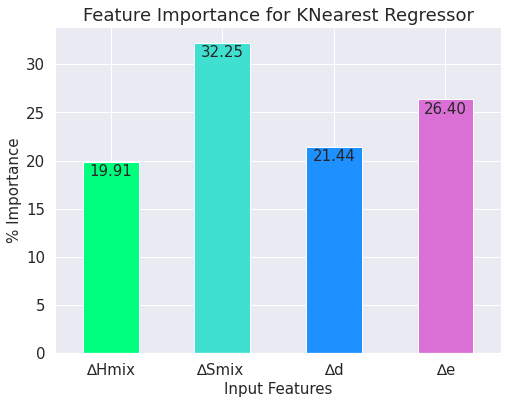

In [74]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
df = pd.DataFrame({'Input Features':['∆Hmix', '∆Smix ', '∆d', '∆e'], '% Importance':[19.910917757660894, 32.249095471213785, 21.44478942660478, 26.39519734452054]})
c = ['springgreen','turquoise','dodgerblue','orchid']
ax = df.plot.bar(x = 'Input Features', y='% Importance', rot=0, color = c, legend=False)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -10), 
                   textcoords = 'offset points')
plt.title("Feature Importance for KNearest Regressor", fontsize=18)
plt.xlabel('Input Features', fontsize=15)
plt.ylabel('% Importance', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()


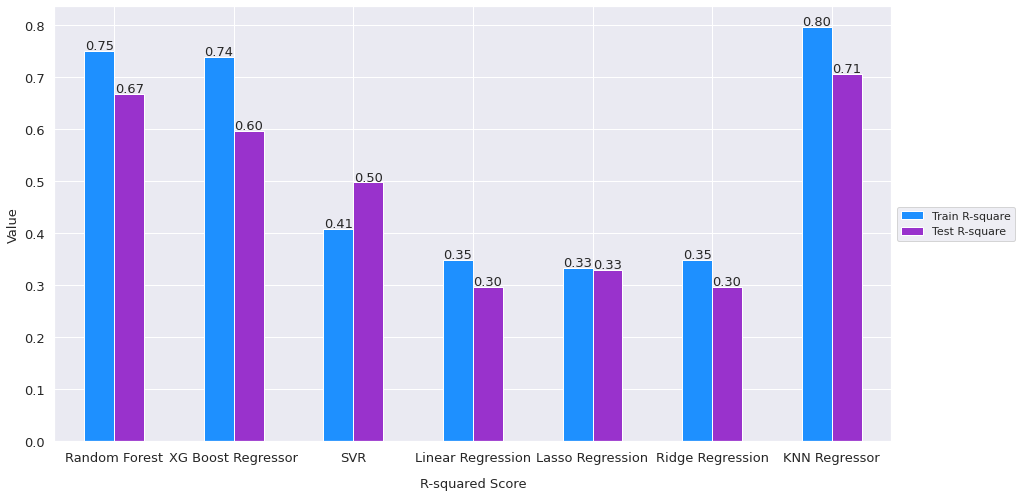

In [82]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)

import matplotlib.pyplot as plt
d = {'Models':['Random Forest', 'XG Boost Regressor','SVR', 'Linear Regression', 'Lasso Regression', 'Ridge Regression','KNN Regressor'], 'Train R-square':list(models_regressor_comparison['Train R-square']), 'Test R-square':list(models_regressor_comparison['Test R-square'])}
df1 = pd.DataFrame(d)

c = ['dodgerblue','darkorchid', 'forestgreen', 'turquoise','springgreen','crimson']
ax = df1.plot.bar(x = 'Models', rot=0, color = c, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel('R-squared Score', fontsize=13, labelpad=13)
plt.ylabel('Value', fontsize=13)
plt.tick_params(labelsize=13)
plt.show()


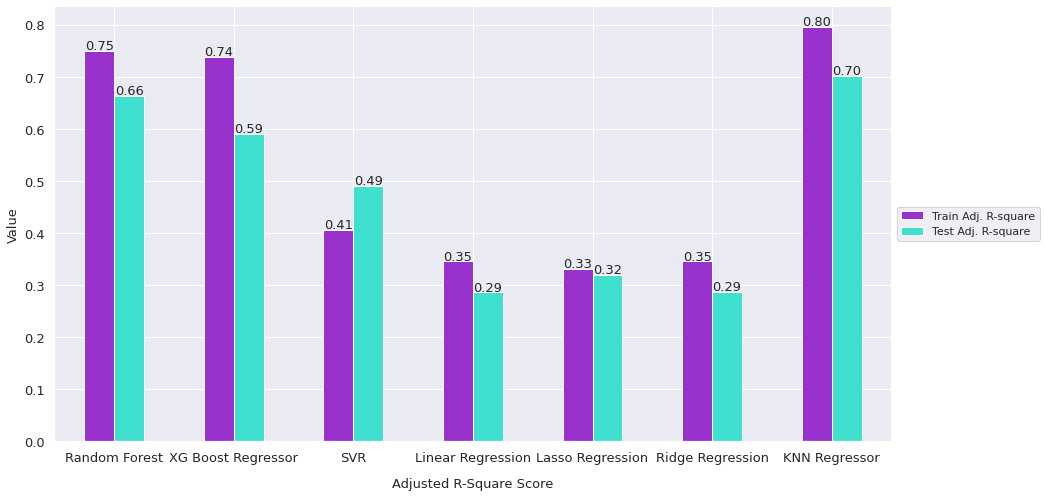

In [83]:
import matplotlib.pyplot as plt
d = {'Models':['Random Forest', 'XG Boost Regressor','SVR', 'Linear Regression', 'Lasso Regression', 'Ridge Regression','KNN Regressor'], 'Train Adj. R-square':list(models_regressor_comparison['Train Adj. R-square']), 'Test Adj. R-square':list(models_regressor_comparison['Test Adj. R-square'])}
df1 = pd.DataFrame(d)

c = [ 'darkorchid', 'turquoise','forestgreen', 'crimson']
ax = df1.plot.bar(x = 'Models', rot=0, color = c, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel('Adjusted R-Square Score', fontsize=13, labelpad=13)
plt.ylabel('Value', fontsize=13)
plt.tick_params(labelsize=13)
plt.show()

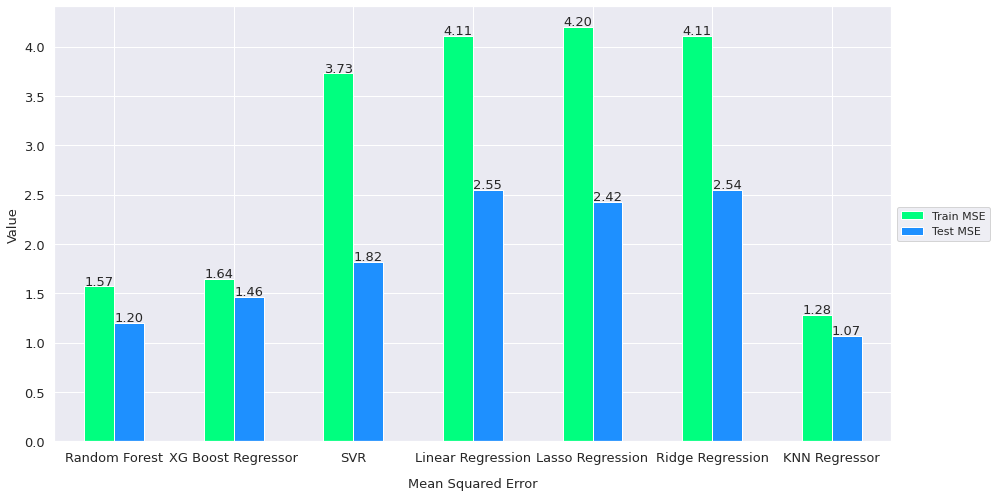

In [84]:
import matplotlib.pyplot as plt
d = {'Models':['Random Forest', 'XG Boost Regressor','SVR', 'Linear Regression', 'Lasso Regression', 'Ridge Regression','KNN Regressor'], 'Train MSE':list(models_regressor_comparison['Train MSE']), 'Test MSE':list(models_regressor_comparison['Test MSE'])}
df1 = pd.DataFrame(d)

c = [ 'springgreen','dodgerblue','darkorchid','forestgreen', 'crimson','turquoise',]
ax = df1.plot.bar(x = 'Models', rot=0, color = c, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel('Mean Squared Error', fontsize=13, labelpad=13)
plt.ylabel('Value', fontsize=13)
plt.tick_params(labelsize=13)
plt.show()


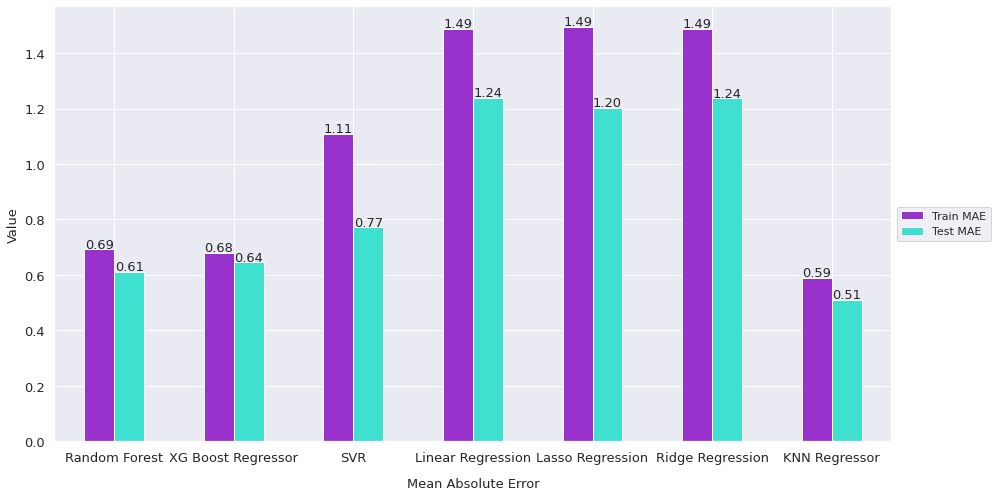

In [85]:
import matplotlib.pyplot as plt
d = {'Models':['Random Forest', 'XG Boost Regressor','SVR', 'Linear Regression', 'Lasso Regression', 'Ridge Regression','KNN Regressor'], 'Train MAE':list(models_regressor_comparison['Train MAE']), 'Test MAE':list(models_regressor_comparison['Test MAE'])}
df1 = pd.DataFrame(d)

c = [ 'darkorchid', 'turquoise','forestgreen', 'crimson']
ax = df1.plot.bar(x = 'Models', rot=0, color = c, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel('Mean Absolute Error', fontsize=13, labelpad=13)
plt.ylabel('Value', fontsize=13)
plt.tick_params(labelsize=13)
plt.show()

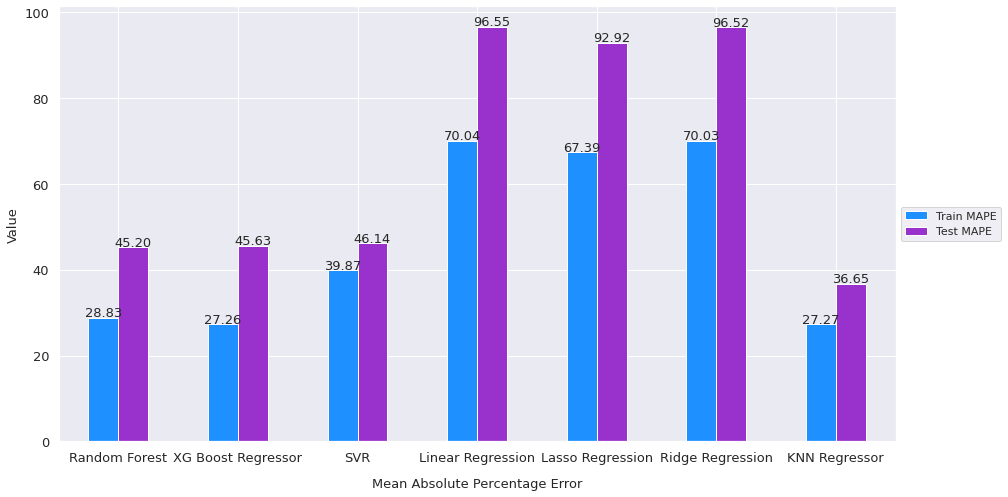

In [86]:
import matplotlib.pyplot as plt
d = {'Models':['Random Forest', 'XG Boost Regressor','SVR', 'Linear Regression', 'Lasso Regression', 'Ridge Regression','KNN Regressor'], 'Train MAPE':list(models_regressor_comparison['Train MAPE']), 'Test MAPE':list(models_regressor_comparison['Test MAPE'])}
df1 = pd.DataFrame(d)

c = ['dodgerblue','darkorchid', 'forestgreen', 'turquoise','springgreen','crimson']
ax = df1.plot.bar(x = 'Models', rot=0, color = c, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel('Mean Absolute Percentage Error', fontsize=13,labelpad=13)
plt.ylabel('Value', fontsize=13)
plt.tick_params(labelsize=13)
plt.show()

In [27]:
print(test_pred.shape,y_test.shape)

(273,) (273, 1)


In [28]:
y_test['D_max'].shape

(273,)

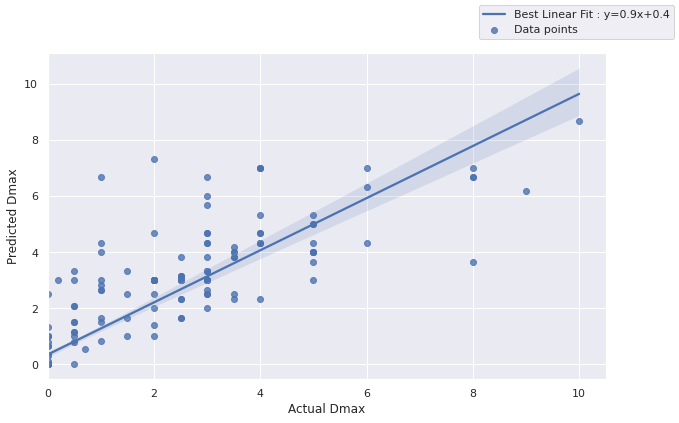

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

test_pred = KNN_regressor_model.predict(x_test_scaled)
# print(test_pred.shape)
d = {'Actual': list(y_test['D_max']), 'Predicted': list(test_pred)}
dmax_df = pd.DataFrame(d)
dmax_df 

sns.set_theme(color_codes=True)
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlim(0, 10.5)
slope, intercept, r_value, p_value, std_err = stats.linregress(dmax_df['Actual'],dmax_df['Predicted'])
sns.regplot(x = 'Actual',y = 'Predicted',data = dmax_df,line_kws={'label':"Best Linear Fit : " + "y={0:.1f}x+{1:.1f}".format(slope,intercept)},label='Data points')
plt.xlabel('Actual Dmax')
plt.ylabel('Predicted Dmax')
fig.legend()
plt.show()

Direct Dmax prediction using Neural Networks

In [12]:
from keras.models import load_model 
NN_model1 = load_model('/content/drive/MyDrive/Mendeley Dataset/Combination/Manual_Segregation/Best_Model(submitted).h5')

NN_model2 = load_model('/content/drive/MyDrive/Mendeley Dataset/Combination/Manual_Segregation/0.7704_0.7195_17.47_33.61/0.7704_0.7195_17.47_33.61(2000_epochs).h5')

NN_model3 = load_model('/content/drive/MyDrive/Mendeley Dataset/Combination/Manual_Segregation/0.8168_0.6937_15.74_36.41.h5')

NN_model4 = load_model('/content/drive/MyDrive/Mendeley Dataset/Combination/Manual_Segregation/0.8305_0.6714_12.84_34.54.h5')

NN_model5 = load_model('/content/drive/MyDrive/Mendeley Dataset/Combination/Manual_Segregation/0.8949_0.7052_10.85_38.61.h5')

NN_model6 = load_model('/content/drive/MyDrive/Mendeley Dataset/Combination/Manual_Segregation/0.7704_0.7195_17.47_33.61/0.8806_0.6613_13.42_36.67.h5')

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae 


pred1 = NN_model1.predict(x_test_scaled).ravel()
tpred1 = NN_model1.predict(x_train_scaled).ravel()

model1_r2_Train = r2_score(y_train,tpred1)
model1_r2_Test = r2_score(y_test, pred1)
model1_mse_Train = mean_squared_error(y_train, np.array(tpred1))
model1_mse_Test = mean_squared_error(y_test, pred1)
model1_mae_Train = mae(y_train, np.array(tpred1))
model1_mae_Test = mae(y_test, pred1)
model1_mape_Train = MAPE(y_train, tpred1)
model1_mape_Test = MAPE(y_test, pred1)
model1_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, model1_r2_Train)
model1_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, model1_r2_Test)

pred2 = NN_model2.predict(x_test_scaled).ravel()
tpred2 = NN_model2.predict(x_train_scaled).ravel()

model2_r2_Train = r2_score(y_train,tpred2)
model2_r2_Test = r2_score(y_test, pred2)
model2_mse_Train = mean_squared_error(y_train, np.array(tpred2))
model2_mse_Test = mean_squared_error(y_test, pred2)
model2_mae_Train = mae(y_train, np.array(tpred2))
model2_mae_Test = mae(y_test, pred2)
model2_mape_Train = MAPE(y_train, tpred2)
model2_mape_Test = MAPE(y_test, pred2)
model2_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, model2_r2_Train)
model2_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, model2_r2_Test)

pred3 = NN_model3.predict(x_test_scaled).ravel()
tpred3 = NN_model3.predict(x_train_scaled).ravel()

model3_r2_Train = r2_score(y_train,tpred3)
model3_r2_Test = r2_score(y_test, pred3)
model3_mse_Train = mean_squared_error(y_train, np.array(tpred3))
model3_mse_Test = mean_squared_error(y_test, pred3)
model3_mae_Train = mae(y_train, np.array(tpred3))
model3_mae_Test = mae(y_test, pred3)
model3_mape_Train = MAPE(y_train, tpred3)
model3_mape_Test = MAPE(y_test, pred3)
model3_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, model3_r2_Train)
model3_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, model3_r2_Test)

pred4 = NN_model4.predict(x_test_scaled).ravel()
tpred4 = NN_model4.predict(x_train_scaled).ravel()

model4_r2_Train = r2_score(y_train,tpred4)
model4_r2_Test = r2_score(y_test, pred4)
model4_mse_Train = mean_squared_error(y_train, np.array(tpred4))
model4_mse_Test = mean_squared_error(y_test, pred4)
model4_mae_Train = mae(y_train, np.array(tpred4))
model4_mae_Test = mae(y_test, pred4)
model4_mape_Train = MAPE(y_train, tpred4)
model4_mape_Test = MAPE(y_test, pred4)
model4_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, model4_r2_Train)
model4_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, model4_r2_Test)

pred5 = NN_model5.predict(x_test_scaled).ravel()
tpred5 = NN_model5.predict(x_train_scaled).ravel()

model5_r2_Train = r2_score(y_train,tpred5)
model5_r2_Test = r2_score(y_test, pred5)
model5_mse_Train = mean_squared_error(y_train, np.array(tpred5))
model5_mse_Test = mean_squared_error(y_test, pred5)
model5_mae_Train = mae(y_train, np.array(tpred5))
model5_mae_Test = mae(y_test, pred5)
model5_mape_Train = MAPE(y_train, tpred5)
model5_mape_Test = MAPE(y_test, pred5)
model5_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, model5_r2_Train)
model5_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, model5_r2_Test)

pred6 = NN_model6.predict(x_test_scaled).ravel()
tpred6 = NN_model6.predict(x_train_scaled).ravel()

model6_r2_Train = r2_score(y_train,tpred6)
model6_r2_Test = r2_score(y_test, pred6)
model6_mse_Train = mean_squared_error(y_train, np.array(tpred6))
model6_mse_Test = mean_squared_error(y_test, pred6)
model6_mae_Train = mae(y_train, np.array(tpred6))
model6_mae_Test = mae(y_test, pred6)
model6_mape_Train = MAPE(y_train, tpred6)
model6_mape_Test = MAPE(y_test, pred6)
model6_adj_r2_Train = adjusted_r_squared(x_train_scaled, y_train, model6_r2_Train)
model6_adj_r2_Test = adjusted_r_squared(x_test_scaled, y_test, model6_r2_Test)

In [14]:
NN_comparison = pd.DataFrame({
    'Model'       : ["Model1", "Model2", "Model3", "Model4", "Model5", "Model6"],
    'R squared Train': [ model1_r2_Train, model2_r2_Train, model3_r2_Train, model4_r2_Train, model5_r2_Train, model6_r2_Train,],
    'R squared Test': [ model1_r2_Test, model2_r2_Test, model3_r2_Test, model4_r2_Test, model5_r2_Test, model6_r2_Test,],
    'MSE Train'    : [ model1_mse_Train, model2_mse_Train, model3_mse_Train, model4_mse_Train, model5_mse_Train, model6_mse_Train,],
    'MSE Test'   : [ model1_mse_Test, model2_mse_Test, model3_mse_Test, model4_mse_Test, model5_mse_Test, model6_mse_Test,],
    'MAE Train'      : [ model1_mae_Train, model2_mae_Train, model3_mae_Train, model4_mae_Train, model5_mae_Train, model6_mae_Train],
    'MAE Test'    : [ model1_mae_Test, model2_mae_Test, model3_mae_Test, model4_mae_Test, model5_mae_Test, model6_mae_Test],
    'MAPE Train'      : [ model1_mape_Train, model2_mape_Train, model3_mape_Train, model4_mape_Train, model5_mape_Train, model6_mape_Train],
    'MAPE Test'    : [ model1_mape_Test, model2_mape_Test, model3_mape_Test, model4_mape_Test, model5_mape_Test, model6_mape_Test],
    'Adj. R squared Train': [ model1_adj_r2_Train, model2_adj_r2_Train, model3_adj_r2_Train, model4_adj_r2_Train, model5_adj_r2_Train, model6_adj_r2_Train,],
    'Adj. R squared Test': [ model1_adj_r2_Test, model2_adj_r2_Test, model3_adj_r2_Test, model4_adj_r2_Test, model5_adj_r2_Test, model6_adj_r2_Test,]
    }, columns = ['Model', 'R squared Train', 'R squared Test', 'Adj. R squared Train', 'Adj. R squared Test','MSE Train', 'MSE Test', 'MAE Train', 'MAE Test', 'MAPE Train', 'MAPE Test'])

NN_comparison.sort_values(by='R squared Test', ascending=False)

,Model,R squared Train,R squared Test,Adj. R squared Train,Adj. R squared Test,MSE Train,MSE Test,MAE Train,MAE Test,MAPE Train,MAPE Test
0,Model1,0.853826,0.757213,0.853216,0.753590,0.921306,0.878688,0.393954,0.433531,14.055073,26.413948
2,Model3,0.743418,0.715002,0.742348,0.710749,1.617185,1.031456,0.585194,0.477520,22.339874,28.291764
4,Model5,0.793202,0.704327,0.792340,0.699914,1.303406,1.070091,0.522030,0.473706,18.296205,30.535535
3,Model4,0.750223,0.686774,0.749181,0.682099,1.574296,1.133619,0.553705,0.495878,17.906993,27.548636
1,Model2,0.690941,0.684319,0.689651,0.679607,1.947943,1.142505,0.652133,0.521287,21.400295,29.194021
5,Model6,0.809089,0.674548,0.808293,0.669690,1.203274,1.177869,0.471594,0.474721,18.041935,30.157557


In [76]:
from sklearn.inspection import permutation_importance
results = permutation_importance(NN_model1, x_train_scaled, y_train, scoring='r2')
importance = results.importances_mean
importance

lp = []
for i in range(len(importance)):
  lp.append( (importance[i]/importance.sum()) * 100 )
lp

[26.98510121986766, 30.522163626589226, 18.792879670593283, 23.699855482949843]

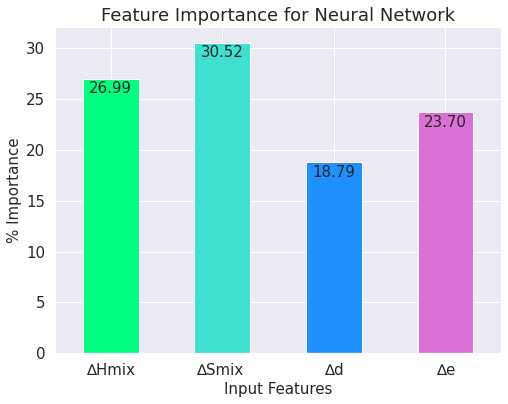

In [77]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
df = pd.DataFrame({'Input Features':['∆Hmix', '∆Smix ', '∆d', '∆e'], '% Importance':[26.98510121986766, 30.522163626589226, 18.792879670593283, 23.699855482949843]})
c = ['springgreen','turquoise','dodgerblue','orchid']
ax = df.plot.bar(x = 'Input Features', y='% Importance', rot=0, color = c, legend=False)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -10), 
                   textcoords = 'offset points')
plt.title("Feature Importance for Neural Network", fontsize=18)
plt.xlabel('Input Features', fontsize=15)
plt.ylabel('% Importance', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()


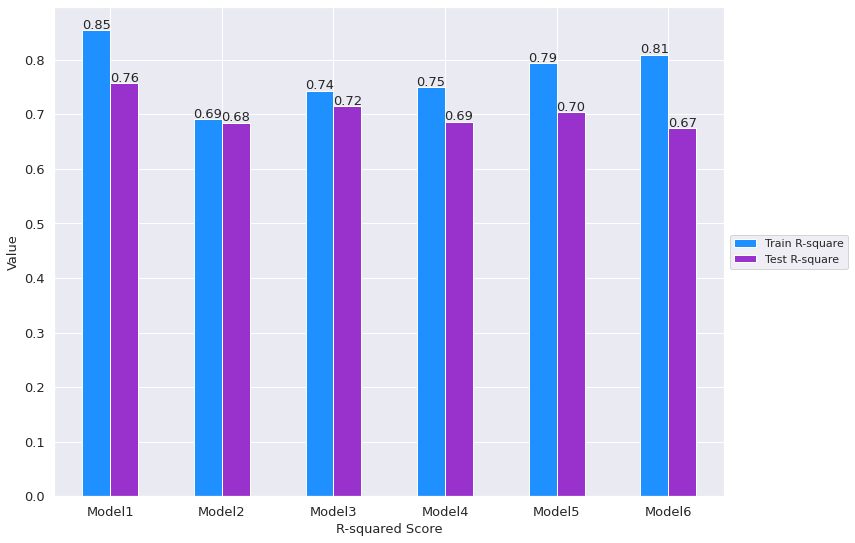

In [87]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)

import matplotlib.pyplot as plt
d = {'Models':['Model1','Model2','Model3','Model4','Model5', 'Model6'], 'Train R-square':list(NN_comparison['R squared Train']), 'Test R-square':list(NN_comparison['R squared Test'])}
df1 = pd.DataFrame(d)

c = ['dodgerblue','darkorchid', 'forestgreen', 'turquoise','springgreen','crimson']
ax = df1.plot.bar(x = 'Models', rot=0, color = c, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel('R-squared Score', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.tick_params(labelsize=13)
plt.show()


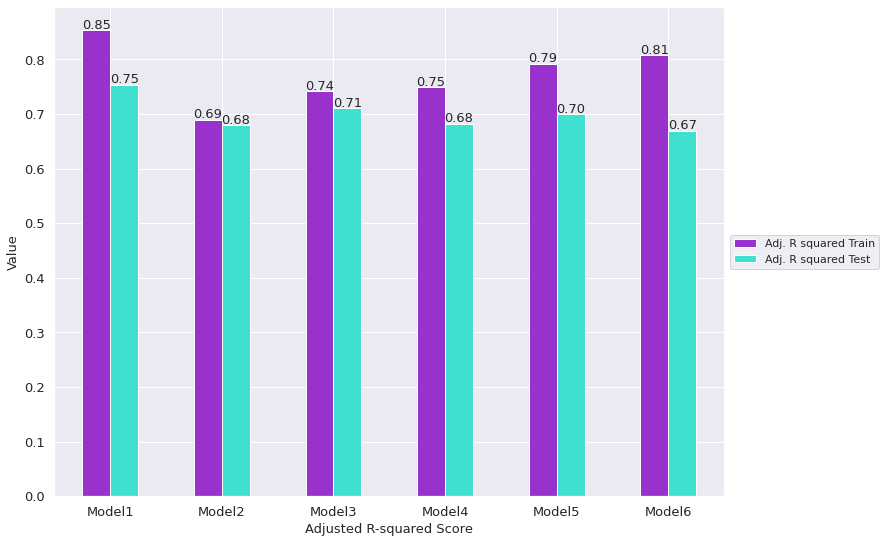

In [88]:
import matplotlib.pyplot as plt
d = {'Models':['Model1','Model2','Model3','Model4','Model5', 'Model6'], 'Adj. R squared Train':list(NN_comparison['Adj. R squared Train']), 'Adj. R squared Test':list(NN_comparison['Adj. R squared Test'])}
df1 = pd.DataFrame(d)

c = [ 'darkorchid', 'turquoise','forestgreen', 'crimson']
ax = df1.plot.bar(x = 'Models', rot=0, color = c, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel('Adjusted R-squared Score', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.tick_params(labelsize=13)
plt.show()

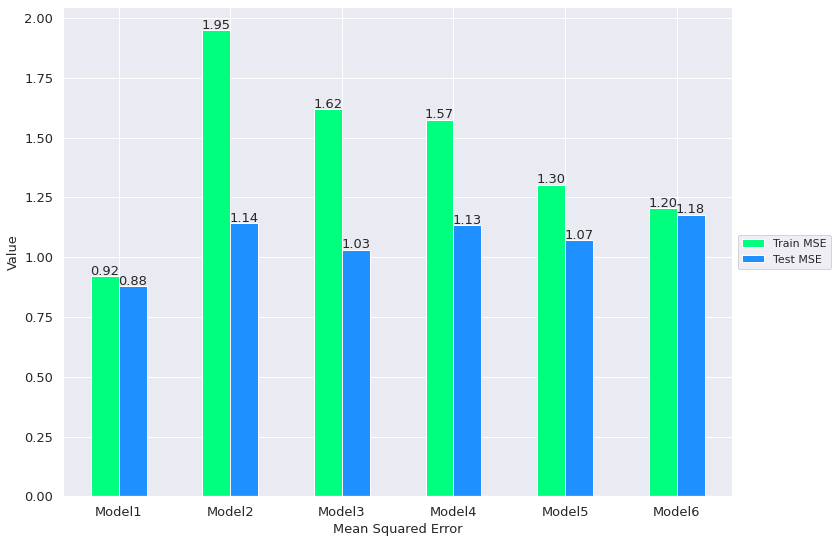

In [89]:
import matplotlib.pyplot as plt
d = {'Models':['Model1','Model2','Model3','Model4','Model5', 'Model6'], 'Train MSE':list(NN_comparison['MSE Train']), 'Test MSE':list(NN_comparison['MSE Test'])}
df1 = pd.DataFrame(d)

c = [ 'springgreen','dodgerblue','darkorchid','forestgreen', 'crimson','turquoise',]
ax = df1.plot.bar(x = 'Models', rot=0, color = c, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel('Mean Squared Error', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.tick_params(labelsize=13)
plt.show()


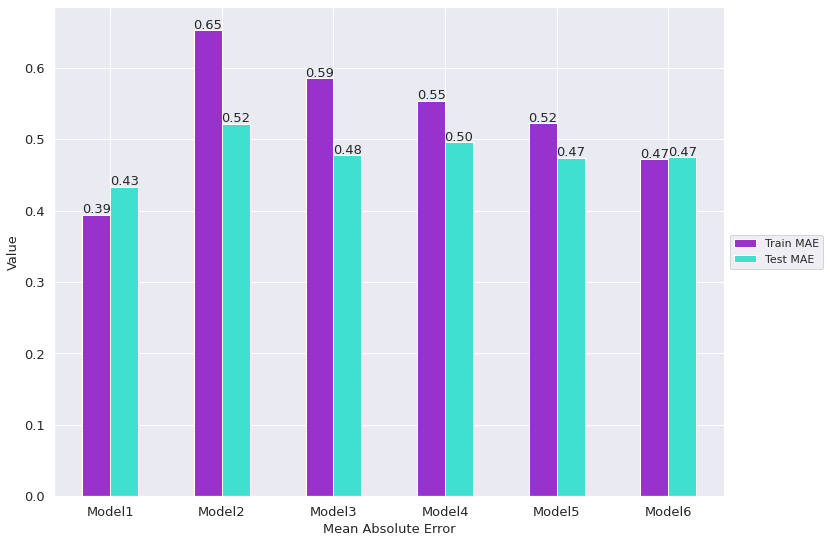

In [90]:
import matplotlib.pyplot as plt
d = {'Models':['Model1','Model2','Model3','Model4','Model5', 'Model6'], 'Train MAE':list(NN_comparison['MAE Train']), 'Test MAE':list(NN_comparison['MAE Test'])}
df1 = pd.DataFrame(d)

c = [ 'darkorchid', 'turquoise','forestgreen', 'crimson']
ax = df1.plot.bar(x = 'Models', rot=0, color = c, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel('Mean Absolute Error', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.tick_params(labelsize=13)
plt.show()

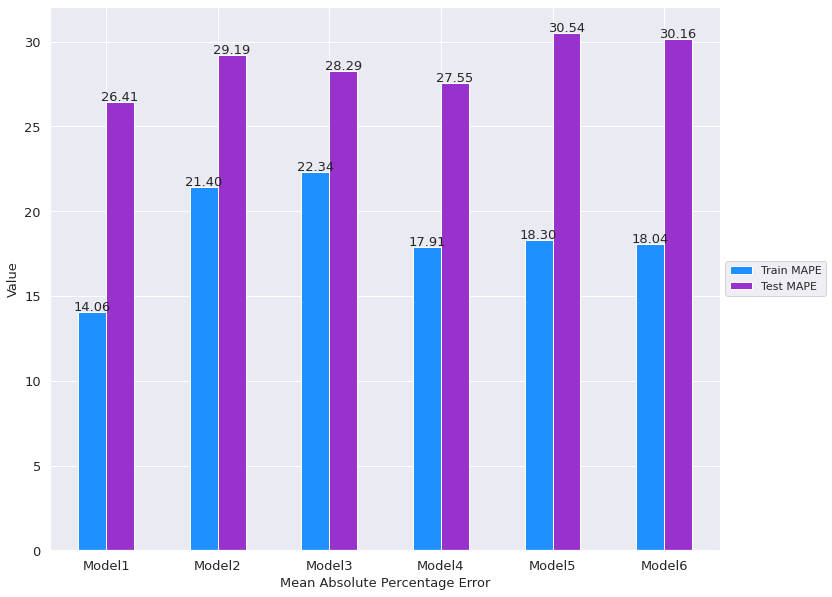

In [91]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,10)

d = {'Models':['Model1','Model2','Model3','Model4','Model5', 'Model6'], 'Train MAPE':list(NN_comparison['MAPE Train']), 'Test MAPE':list(NN_comparison['MAPE Test'])}
df1 = pd.DataFrame(d)

c = ['dodgerblue','darkorchid', 'forestgreen', 'turquoise','springgreen','crimson']
ax = df1.plot.bar(x = 'Models', rot=0, color = c, legend=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=13,
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel('Mean Absolute Percentage Error', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.tick_params(labelsize=13)
plt.show()

In [15]:
b = []
NN_preds = NN_model1.predict(x_test_scaled)
for i in range(NN_preds.shape[0]):
  b.append(NN_preds[i][0])

In [16]:
print( len(b),test_pred.shape)

273 (273,)


In [17]:
pred_df = pd.DataFrame(data = {'true':y_test['D_max'], 'Ann':b, 'knn':test_pred})
pred_df.head()

,true,Ann,knn
0,0.0,-0.000082,0.000000
1,6.0,5.020169,4.333333
2,2.5,-0.000099,3.166667
3,4.0,5.397665,5.333333
4,0.0,-0.000151,0.000000


In [18]:
pred_df.to_csv("/content/drive/MyDrive/Mendeley Dataset/Combination/Manual_Segregation/prediction_dataframe.csv")

In [19]:
df = pd.read_csv("/content/drive/MyDrive/Mendeley Dataset/Combination/Manual_Segregation/prediction_dataframe.csv")
print(df.shape)
df.drop(['Unnamed: 0', 'knn'], axis = 1, inplace = True)

(273, 4)


In [20]:
df.columns

Index(['true', 'Ann'], dtype='object')

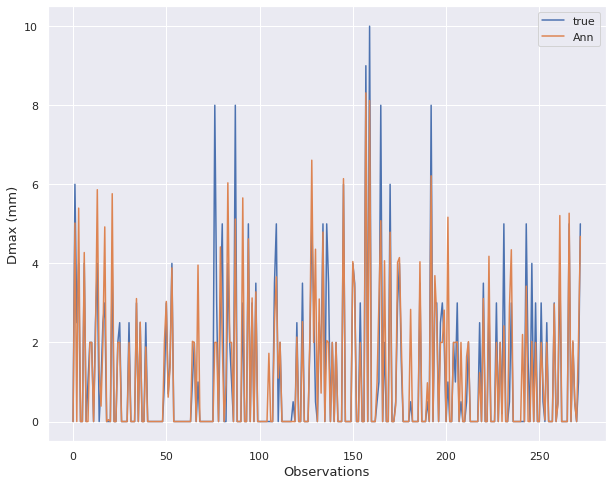

In [21]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)

lines = df.plot.line()
plt.xlabel('Observations', fontsize = 13)
plt.ylabel('Dmax (mm)', fontsize = 13)
plt.show()

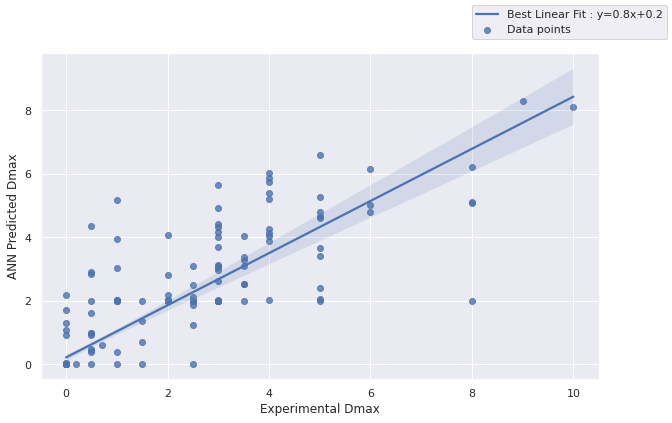

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


sns.set_theme(color_codes=True)
fig = plt.figure(figsize=(10,6))
slope, intercept, r_value, p_value, std_err = stats.linregress(pred_df['true'],pred_df['Ann'])
sns.regplot(x = 'true',y = 'Ann',data = pred_df,line_kws={'label':"Best Linear Fit : " + "y={0:.1f}x+{1:.1f}".format(slope,intercept)},label='Data points')
plt.xlabel('Experimental Dmax')
plt.ylabel('ANN Predicted Dmax')
fig.legend()
plt.show()

                    R squared Train  R squared Test  ...  MSE Train  MSE Test
ANN                        0.853826        0.757213  ...   0.921306  0.878688
KNearest Regressor         0.796148        0.705662  ...   1.284837  1.065259

[2 rows x 6 columns]


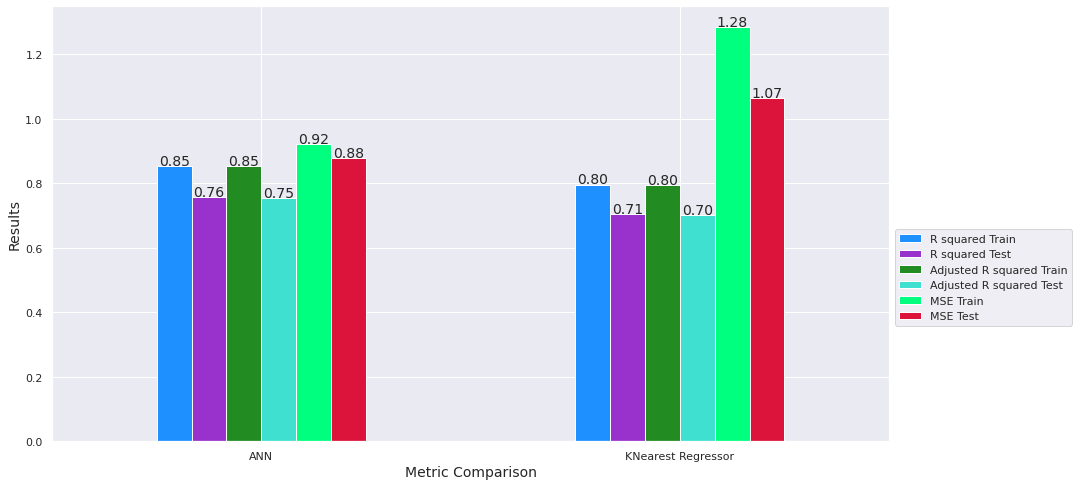

In [94]:
compare = {}

compare['ANN'] = [0.853826 ,0.757213 ,0.853216 ,0.753590 ,0.921306 ,0.878688]
compare['KNearest Regressor'] = [0.796148,	0.705662,	0.795298,	0.701269,	1.284837,	1.065259]

compare_df = pd.DataFrame(compare.values(),columns=['R squared Train','R squared Test', 'Adjusted R squared Train','Adjusted R squared Test',	'MSE Train',	'MSE Test' ],index=compare.keys())
print(compare_df)
c = ['dodgerblue','darkorchid', 'forestgreen', 'turquoise','springgreen','crimson']
ax = compare_df.plot.bar(figsize=(15,8), rot=0, color = c)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=14,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

# plt.title('Models Comparison')
plt.xlabel('Metric Comparison', fontsize = 14)
plt.legend(loc = 'best',bbox_to_anchor=(1.0,0.5))
plt.ylabel('Results', fontsize = 14)
# plt.ylabel('R-Squared Score')
plt.show()

                    MAE Train  MAE Test  MAPE Train  MAPE Test
ANN                  0.393954  0.433531   14.055073  26.413948
KNearest Regressor   0.589260  0.509341   27.270743  36.650806


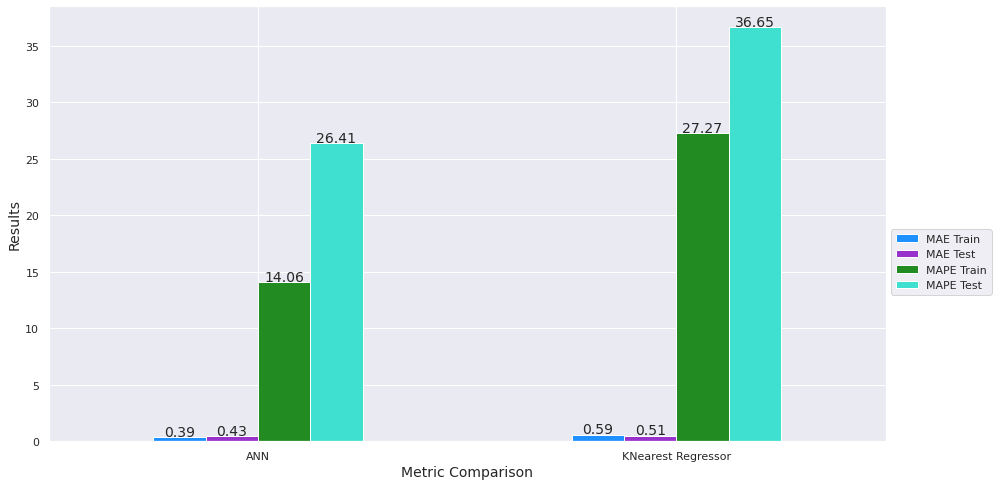

In [95]:
compare = {}

compare['ANN'] = [0.393954,0.433531 ,14.055073 ,26.413948]
compare['KNearest Regressor'] = [0.589260,	0.509341,	27.270743,	36.650806]

compare_df = pd.DataFrame(compare.values(),columns=[ 	'MAE Train',	'MAE Test','MAPE Train',	'MAPE Test'],index=compare.keys())
print(compare_df)
c = ['dodgerblue','darkorchid', 'forestgreen', 'turquoise','springgreen','crimson']
ax = compare_df.plot.bar(figsize=(15,8), rot=0, color = c)


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=14,
                   xytext = (0, 5), 
                   textcoords = 'offset points')

# plt.title('Models Comparison')
plt.xlabel('Metric Comparison', fontsize = 14)
plt.legend(loc = 'best',bbox_to_anchor=(1.0,0.5))
plt.ylabel('Results', fontsize = 14)
# plt.ylabel('R-Squared Score')
plt.show()

In [49]:
NN_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 88)                440       
_________________________________________________________________
dense_1 (Dense)              (None, 70)                6230      
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 38)                2698      
_________________________________________________________________
dense_3 (Dense)              (None, 18)                702       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 152       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9

In [50]:
NN_model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 88)                440       
_________________________________________________________________
dense_1 (Dense)              (None, 78)                6942      
_________________________________________________________________
dense_2 (Dense)              (None, 68)                5372      
_________________________________________________________________
dropout (Dropout)            (None, 68)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 38)                2622      
_________________________________________________________________
dense_4 (Dense)              (None, 28)                1092      
_________________________________________________________________
dense_5 (Dense)              (None, 18)                5

In [51]:
NN_model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1025      
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 96        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 1,718
Trainable params: 1,718
Non-trainable params: 0
______________________________________________________

In [52]:
NN_model4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                200       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1230      
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 168       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 2,227
Trainable params: 2,227
Non-trainable params: 0
______________________________________________________

In [53]:
NN_model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 88)                440       
_________________________________________________________________
dense_1 (Dense)              (None, 70)                6230      
_________________________________________________________________
dropout (Dropout)            (None, 70)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 38)                2698      
_________________________________________________________________
dense_3 (Dense)              (None, 18)                702       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 152       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9

In [54]:
NN_model6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9